In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Checking the consistency of some data I have, with itself and with published data

Aaron Wilkinson gave me the data he published in his 2021 paper, on Mstar-bias-Mhalo results for PSBs in COSMOS and UDS.

He sent me summarized data first. That missed a column (averge Mstar in bins) and when I asked for that column I just got the whole data set. Here, I check if that complete catalog and the summarized data are compatible with each other and whether I can reproduce the data published in the paper. 

Then, I use the summarized data (for now) in my PSB efforts.

## Summarized data

In [3]:
# Read Wilkinson observational results
wilkinson_data = 'data/PSBs_Wilkinson.csv'
wilkinson = pd.read_csv(wilkinson_data)

# Helpful "average" Mstar
wilkinson['Mstar'] = (wilkinson.Mstar_max + wilkinson.Mstar_min)/2.
# Seems this is done IT IS NOT!
wilkinson['Mstar'] = wilkinson.Mstar_min + 0.25


wilkinson.head(20)
# Note that

,survey,z_min,z_max,Mstar_min,Mstar_max,N,sum_weight,b,sigma_b,M_halo,M_halodn,M_haloup,Mstar
0,UDS,0.5,1.0,9.0,9.5,234,200.17,4.94,0.68,14.4,14.2,14.5,9.25
1,UDS,0.5,1.0,9.5,10.0,69,58.64,3.10,1.00,13.8,13.3,14.2,9.75
2,UDS,0.5,1.0,10.0,10.5,44,36.55,1.06,0.93,11.8,8.4,13.2,10.25
3,UDS,1.0,1.5,9.5,10.0,179,112.82,4.96,0.88,14.0,13.8,14.2,9.75
4,UDS,1.0,1.5,10.0,10.5,202,146.70,1.70,0.63,12.4,11.2,13.0,10.25
5,UDS,1.0,1.5,10.5,12.0,136,105.27,1.87,0.74,12.6,11.4,13.1,10.75
6,UDS,1.5,2.0,10.0,10.5,144,125.05,3.73,0.74,13.3,13.0,13.5,10.25
7,UDS,1.5,2.0,10.5,12.0,178,158.10,2.44,0.61,12.6,12.1,13.0,10.75
8,UDS,2.0,2.5,10.0,10.5,167,84.64,4.74,1.32,13.3,12.8,13.6,10.25
9,UDS,2.0,2.5,10.5,12.0,154,97.38,2.19,0.92,12.0,10.7,12.7,10.75


## Full catalogs

I obtained the full catalogs in .fits format. The email that came with it is in teh README in the data directory. Repeated here:

If it's ok with you, I am sending you the link for the UDS and COSMOS catalogues that were used as input for the clustering algorithm (https://drive.google.com/drive/folders/1ep_oQTQBNqbS22d-6hqw29UL3C14ITry?usp=sharing). The relevant columns for you are 
- MASS_SC (stellar masses), 
- CLASS (1=quiescent, 2=SF, 5=PSB, 6=dusty - you should combine SF and dusty), 
- ZUSED (redshifts), 
- CHI_A (chi-sq from redshift fitting for UDS; you need to set this to CHI_A< 30) and 
- CHI2_BEST (reduced chi-sq from COSMOS redshift fitting; set to < 2.5). 

Other quantities that may interest you are LGSFR_SC and LGSSFR_SC, for SFRs and sSFRs respectively. The K magnitude limits are already applied: UDS - K<24.5, COSMOS - K<23.4. I think that's everything you need, but please let me know if you need the other columns describing.


In [24]:
path_to_catalogs = '/data/astro/COSMOS_UDS/'
with fits.open(path_to_catalogs+'UDS_0.5_3.0_udsdr11_07012020_K24p5_0p5z3_multi5z_prob02.fits') as hdul:
    UDS_header = hdul[1].header
    UDS_data = hdul[1].data
    print(hdul.info())
print()
with fits.open(path_to_catalogs+'COSMOS_0.5_2.5_cosmos2015_16012020_K23p4_0p5z2p5_multi4z.fits') as hdul:
    COSMOS_header = hdul[1].header
    print(hdul.info())

Filename: /data/astro/COSMOS_UDS/UDS_0.5_3.0_udsdr11_07012020_K24p5_0p5z3_multi5z_prob02.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (3435,)   uint8   
  1  Joined        1 BinTableHDU     92   168246R x 40C   ['13E', '13E', 'E', 'E', 'E', '3E', '3E', '3E', '3E', 'E', 'E', 'I', 'J', 'J', 'E', 'E', 'E', 'E', 'E', '3E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '3E', 'J', 'E', 'E', 'J', 'E', 'E']   
None

Filename: /data/astro/COSMOS_UDS/COSMOS_0.5_2.5_cosmos2015_16012020_K23p4_0p5z2p5_multi4z.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (4517,)   uint8   
  1  Joined        1 BinTableHDU     86   137005R x 37C   [15E, 15E, E, E, E, 3E, 3E, 3E, 3E, E, E, I, J, J, E, E, E, E, 3E, E, E, E, E, E, E, E, E, E, E, E, 3E, J, E, E, J, E, E]   
None


In [35]:
UDS_header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                  302 / width of table in bytes                        
NAXIS2  =               168246 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                   40 / number of columns                              
EXTNAME = 'Joined  '           / table name                                     
TTYPE1  = 'FLUX    '           / label for column 1                             
TFORM1  = '13E     '           / format for column 1                            
TTYPE2  = 'FLUX_ERR'           / label for column 2                             
TFORM2  = '13E     '        

(array([20047., 23268., 19885., 34859., 12351., 11695., 17107., 10598.,
         8638.,  4980.]),
 array([0.51 , 0.758, 1.006, 1.254, 1.502, 1.75 , 1.998, 2.246, 2.494,
        2.742, 2.99 ], dtype=float32),
 <BarContainer object of 10 artists>)

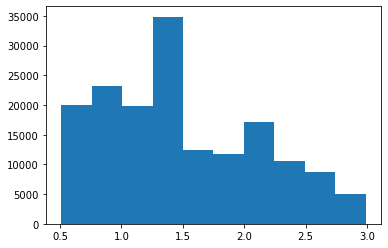

In [32]:
mask_UDS = ((UDS_data['CHI_A']<30) & (UDS_data['MASS_SC'] > 0))
plt.hist(UDS_data['ZUSED'][mask_UDS])

In [40]:
temp_mask = ((UDS_data['CHI_A'] < 30) & 
            (UDS_data['MASS_SC'] > 9.5) &
            (UDS_data['MASS_SC'] < 10) &
            (UDS_data['CLASS'] == 5) &
            (UDS_data['ZUSED'] > 1.) &
            (UDS_data['ZUSED'] < 1.5) &
            (UDS_data['KMAG'] < 24.5))
len(UDS_data[temp_mask])

189

In [39]:
wilkinson.loc[3,:]

survey           UDS
z_min            1.0
z_max            1.5
Mstar_min        9.5
Mstar_max       10.0
N                179
sum_weight    112.82
b               4.96
sigma_b         0.88
M_halo          14.0
M_halodn        13.8
M_haloup        14.2
Mstar           9.75
Name: 3, dtype: object